In [9]:
## IMPORTS ##
from __future__ import division, print_function
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline
import PDSim.core.integrators as integrators # The abstract integrators with callback functions
from PDSim.misc.datatypes import arraym # An optimized list-like object with rapid element-wise operators

## Introduction

Ultimately what we are trying to do is to arrive at a generalized integrator of systems of derivatives that will allow us to inject our own callback functions at the relevant times.

But equivalently, we don't want to have to copy our code multiple different places to implement a different integrator.  Thus our goal is to have generalized code.  It is here that object oriented code shines.

The approach is this:

* Write a generalized abstract base class for an integrator that defines the callbacks that MUST be implemented
* Generate implementations for different integrators (still abstract since no implementation of callbacks is provided)
* Finalize the integrator by merging with a class that finally defines the callback functions
* Generate concrete classes for each integrator

In [10]:
class TestIntegrator(object):
    """
    Implements the functions needed to satisfy the abstract base class requirements
    """

    def __init__(self):
        self.x, self.y = [], []

    def post_deriv_callback(self): 
        """ Don't do anything after the first call is made to deriv function """
        pass

    def premature_termination(self): 
        """ Don't ever stop prematurely """
        return False

    def get_initial_array(self):
        """ The array of initial values"""
        return arraym([1.0])

    def pre_step_callback(self): 
        if self.Itheta == 0:
            self.x.append(self.t0)
            self.y.append(self.xold[0])

    def post_step_callback(self): 
        self.x.append(self.t0)
        self.y.append(self.xold[0])

    def derivs(self, t0, xold):
        return arraym([xold[0]])
            

And now we define the actual concrete implementations of the integrators, which are formed of the common functions and the abstract integrator

In [11]:
class TestEulerIntegrator(TestIntegrator, integrators.AbstractSimpleEulerODEIntegrator):
    """ Mixin class using the functions defined in TestIntegrator """
    pass

class TestHeunIntegrator(TestIntegrator, integrators.AbstractHeunODEIntegrator):
    """ Mixin class using the functions defined in TestIntegrator """
    pass

class TestRK45Integrator(TestIntegrator, integrators.AbstractRK45ODEIntegrator):
    """ Mixin class using the functions defined in TestIntegrator """
    pass
    

And now we actually implement the integrators, for a few different levels of precision.  Look how nicely RK45 fares!

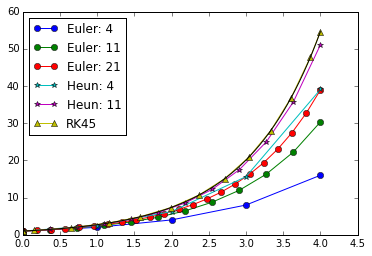

In [13]:
for N in [4, 11, 21]:
    TEI = TestEulerIntegrator()
    TEI.do_integration(N, 0.0, 4.0)
    plt.plot(TEI.x, TEI.y, 'o-', label = 'Euler: ' + str(N))

for N in [4, 11]:
    THI = TestHeunIntegrator()
    THI.do_integration(N, 0.0, 4.0)
    plt.plot(THI.x, THI.y, '*-', label = 'Heun: ' + str(N))

TRKI = TestRK45Integrator()
TRKI.do_integration(0.0, 4.0, eps_allowed = 1e-5)
plt.plot(TRKI.x, TRKI.y, '^-', label = 'RK45')

t = np.linspace(0, 4, 500)
plt.plot(t, np.exp(t), 'k', lw = 1)
lgnd = plt.legend(loc='best')